________
<a id="top"></a>
## Task 2 - Housing Loan


## Contents
* <a href="#tsk2_bu_understanding">Business Understanding</a>

* <a href="#tsk2_dataprepI">Data Prep Part I for Task 2</a>
    * <a href="#tsk2_dataprepmodules">Import Modules</a>
    * <a href="#tsk2_dataprepviewdata">View Data</a>
    * <a href="#tsk2_dataprepnulls">Validate Nulls</a>
    * <a href="#tsk2_dataprepdups">Validate Duplicate Entries</a>
    * <a href="#tsk2_datapreptarget">Set Target Variable</a>
* <a href="#TrainingSet">Training Date Set-Up</a>
    * <a href="#TrainingSet_CategVarSetUp">Convert Categorical Variables</a>
    * <a href="#TrainingSetClassPredVar">Seperate Class and Predictor Variables</a>
    * <a href="#TrainingSetFeatElim">Feature Elimination</a>
* <a href="#ModelLR">Model Build</a>
    * <a href="#ModelLRBuild">Logistic Regression (LR) Building</a>
    * <a href="#ModelLRFeatureAnalysis">LR Feature Analysis</a>
* <a href="#ModelLDA">Gather Numeric Variables for LDA</a>
* <a href="#FeatureSelection">Feaature Selection</a>
    * <a href="#FeatureSelectionChiSq">Chi-Sq Test</a>
    * <a href="#FeatureSelectionPearosn">Pearson Correlation</a>
    * <a href="#FeatureSelectionChiSqII">Chi-Sq Test Feature Selection</a>
* <a href="#LRFitting">LR Fit Estimator</a>
* <a href="#LRFittingSelection">LR Feature Selection</a>
* <a href="#RFFeatSelection">Random Forest (RF) Feature Selection</a>
* <a href="#LGBMFeatSelection">Light GBM Feature Selection</a>
* <a href="#FeatSelectionSummary">Feature Selection Summary</a>
* <a href="#SummaryObjDataPrep1">Objective Summary</a>

________
<a id="tsk2_bu_understanding"></a>
### Business Understanding (2nd Variable)

The team decided that the variable housing would be of interest to the banks as this could be an avenue for additional revenue for the industry.  Individuals and families that own homes could be swayed into refinancing homes for a lower interest rate or need other loans to pay for home improvements.  These transactions, though benefiting the home owner in the short term, in the long run banks do benefit additionally with fees and service transactions that must be paid.

The housing variable is a binary response that is balanced in our sampled data set (the population of the bank clients that have a home loan are unknown).  The variable represents if the client has or does not have a home loan.

From the figure 1 we can see several trends happening during the time of the data set (ref: https://tradingeconomics.com/portugal):
- Household savings increasing
- Bank lending decreasing
- Average wage increasing
- Consumer spending decreasing

_Figure 1:_

![alt text](https://github.com/nhendersonkuns/awesomedataminers/raw/master/ReferenceMaterial/HousingReasons.PNG "Key Indicators")

During the time of the marketing campaign, a global recession occurred (figure 2).  We inferred that to prepare for the possiblity of upcoming hardships, many individuals/families would have attemped to save more of their disposable income.  The above charts yields us to that inference.  The banks could use this data to direct resources in an attempt to help these home owners refinance and save additional disposable income.  This helps out the customers in the short term and helps out the bank in the long term now that they have gained customers and revenue from interest payments. 

_Figure 2:_
![alt text](https://github.com/nhendersonkuns/awesomedataminers/raw/master/ReferenceMaterial/StockMarketCompare.PNG "US vs Portugal Stock")

________
<a href="#top">Back to Top</a>
<a id="tsk2_dataprepI"></a>
### Data Preparation Part 1 for Task 2

<a id="tsk2_dataprepmodules"></a>
### Import Modules

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime 
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

<a id="tsk2_dataprepviewdata"></a>
### View Data

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


<a id="tsk2_dataprepnulls"></a>
### Validate Nulls

In [3]:
#Check for null values in data Frame
bankPromoModel_hsng_Df.isnull().any()

NameError: name 'bankPromoModel_hsng_Df' is not defined

**_As all the missing/unknown values in the dataset have been accounted already. Our dataset contains no missing values_**

<a id="tsk2_dataprepdups"></a>
### Identify duplicate entires

In [ ]:
# To find duplicated rows in data Frame
bankPromoModel_hsng_Df.duplicated().any()

**_There are no duplicate values for any observations/rows in our data set._**

________
<a href="#top">Back to Top</a>
<a id="tsk2_datapreptarget"></a>
### Set Target Variable

#### Get list of categorical variables , keeping 'housing' as target/response variable for Task 2

In [4]:
# Make a copy of original data frame
bankPromoModel_hsng_Df = bankPromo_df.copy()
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng_Df['housing']

# List final variables of the new dataset
bankPromoModel_hsng_Df.info()

# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromoModel_hsng_Df.columns:
    if bankPromoModel_hsng_Df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromoModel_hsng_Df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
#categoricalVars.remove('housing')

print(numericalVars)
print(categoricalVars)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
Target        45211 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


________
<a href="#top">Back to Top</a>
<a id="TrainingSet"></a>
       
### Training Data Set-up

________
<a href="#top">Back to Top</a>
<a id="TrainingSet_CategVarSetUp"></a>
       
### Convert Categorical to Indicators

In [5]:
## Training Dataset
###################
# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng_Df = pd.concat((bankPromoModel_hsng_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng_Df.drop(categoricalVars, inplace=True, axis=1)
print("Training dataset info")
print("=====================")
bankPromoModel_hsng_Df.info()


Training dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-

________
<a id="top"></a>
<a id="TrainingSetClassPredVar"></a>
       
### Seperate Class and Predictor Variables

In [6]:
### Seperate the class and predictor variables
if 'Target' in bankPromoModel_hsng_Df:
    y = bankPromoModel_hsng_Df['Target'].values # get the labels we want
    del bankPromoModel_hsng_Df['Target']        # get rid of the class label
    X = bankPromoModel_hsng_Df.values           # use everything else to predict!


________
<a id="top"></a>
<a id="TrainingSetFeatElim"></a>

### Feature Elimination Using Lasso Logistic Regression

Featuring the same dataset as Task1 , it does not have a very high dimensionality , an attempt is made to eliminate any features that may not be useful to our task of classification of the response variable. A simple Logistic Regression model is run to analyze any features that can be eliminated.
From our EDA phase, we know that dataset hosts an almost balanced set for response variable("housing") classifiers - 56% for Yes and 44% for No. So for executing a simple model, class_weight as None is used.

________
<a href="#top">Back to Top</a>
<a id="ModelLR"></a>
       
### Model Building

________
<a id="ModelLRBuild"></a>
       
### Logistic Regression Build

month_aug has weight of -0.8218055880934713
month_jun has weight of -0.5133078366224679
age has weight of -0.34770575197344655
month_jul has weight of -0.33219653576913705
month_feb has weight of -0.30401987123143503
job_student has weight of -0.2298849457383366
month_jan has weight of -0.22251032200338852
month_sep has weight of -0.21537644820959612
month_oct has weight of -0.21508786998788285
Subscribed_yes has weight of -0.21214732837628966
marital_single has weight of -0.20485834964766605
job_retired has weight of -0.20184179660375864
job_unknown has weight of -0.17482566966737745
month_mar has weight of -0.16929127133360752
month_nov has weight of -0.1548033384929472
month_dec has weight of -0.13777989156208167
poutcome_success has weight of -0.12940030098315464
day has weight of -0.11748156842113988
job_housemaid has weight of -0.10266310732500522
job_unemployed has weight of -0.0914933371853685
contact_telephone has weight of -0.06990775131880754
education_unknown has weight of 

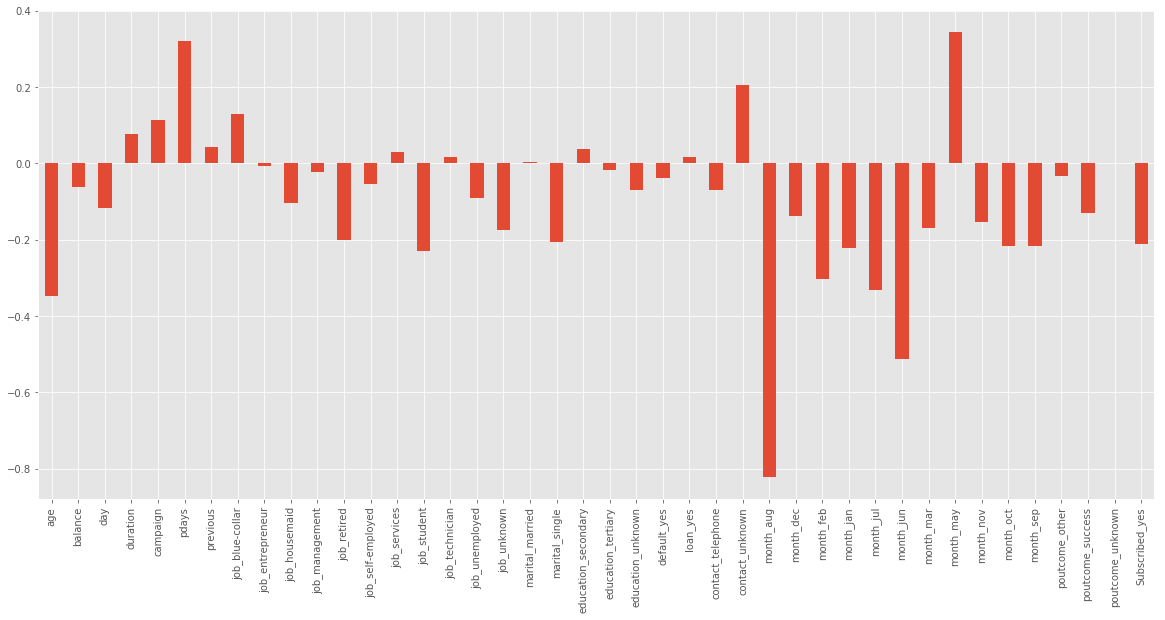

In [7]:
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel_hsng = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=1.0,\
                                                                   class_weight=None, random_state=999, \
                                                                   solver='liblinear'))

# Fit the whole training dataset now, since validation would be done on additional dataset
logisticModel_hsng.fit(X,y) 

classifier_model = logisticModel_hsng.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_hsng_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_hsng_Df.columns)
weights.plot(kind='bar')
plt.show()

________
<a href="#top">Back to Top</a>
<a id="ModelLRFeatureAnalysis"></a>
       
### Logistic Regression Feature Analysis

As seen, above from results of Lasso Logistic Model with degree = 1 that following features ( with coeff = 0 ) can be eliminated. Next, we will explore them one by one :
    
    poutcome_unknown has weight of 0.0
    
Only 1 feature shows a -.0 coeff and is a level of categorical variable. **Hence this cannot be eliminated**. Next attempt was made to look at this model with different methods used for feature elimination to see if the results were different.

#####  Delete any features that do not relate to the response variable in the business sense

BankPromo dataset contains 

i) bank client data like age, balance, education, job , marital status , any loans - housing/personal , if they have defaulted  

ii) information regarding last contact  in current campaign - contact type, day/month when last contacted, duration of last call 

iii) other attributes like number of times contacted during current campaign ,number of days since last contact, number of contacts made in last campaign, outcome from previous campaign , outcome from current campagin i.e. Subscribed or not  


From business use case perspective, any information regarding Term deposit subscription campaign may have no effect on the client data but vice-versa may not be true. It will be interesting to find what features from the campaign information should be considered to predict if a customer has a housing loan or not

In [8]:
bankPromoModel_hsng_Df.values

array([[  58, 2143,    5, ...,    0,    1,    0],
       [  44,   29,    5, ...,    0,    1,    0],
       [  33,    2,    5, ...,    0,    1,    0],
       ...,
       [  72, 5715,   17, ...,    1,    0,    1],
       [  57,  668,   17, ...,    0,    1,    0],
       [  37, 2971,   17, ...,    0,    0,    0]], dtype=int64)

________
<a href="#top">Back to Top</a>
<a id="ModelLDA"></a>
       
### Gather Numeric Variables for LDA

In [9]:
# gather numerical variables for LDA

X_fs = bankPromoModel_hsng_Df.copy()
y_fs = y

print("X_fs info")
print("==========")
X_fs.info()

print("y_fs info")
print("==========")
print(y_fs.dtype)

X_fs info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
e

________
<a href="#top">Back to Top</a>
<a id="FeatureSelection"></a>
       
### Feature Selections

<a id="FeatureSelectionChiSq"></a>
### Chi-Sq Test

In [10]:
# Chi-Sq test for feature selection amongst categorical variables
# below code referred from http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)
    
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)

________
<a href="#top">Back to Top</a>
<a id="FeatureSelectionPearosn"></a>

### Pearson Correlation

In [11]:
# Pearson Correlation
feature_name = X_fs.columns.tolist()

def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-18:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X_fs, y_fs)
print(str(len(cor_feature)), 'selected features')

print(pd.DataFrame( cor_feature))

18 selected features
                      0
0           job_unknown
1             month_sep
2         job_housemaid
3     contact_telephone
4           job_student
5             month_oct
6      poutcome_success
7    education_tertiary
8   education_secondary
9             month_jun
10                pdays
11       Subscribed_yes
12          job_retired
13      job_blue-collar
14                  age
15      contact_unknown
16            month_aug
17            month_may


________
<a href="#top">Back to Top</a>
<a id="FeatureSelectionChiSqII"></a>
### Chi-Sq Test

In [12]:
# Chi-sq test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_fs)
chi_selector = SelectKBest(chi2, k=18)
chi_selector.fit(X_norm, y_fs)

chi_support = chi_selector.get_support()
chi_feature = X_fs.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

print(pd.DataFrame(chi_feature))

18 selected features
                      0
0       job_blue-collar
1         job_housemaid
2           job_retired
3          job_services
4           job_student
5           job_unknown
6   education_secondary
7    education_tertiary
8     contact_telephone
9       contact_unknown
10            month_aug
11            month_jun
12            month_mar
13            month_may
14            month_oct
15            month_sep
16     poutcome_success
17       Subscribed_yes


________
<a href="#top">Back to Top</a>
<a id="LRFitting"></a>
### Logistic Regression Fitting Estimator

In [13]:
## Logistic Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=18, step=10, verbose=5)
rfe_selector.fit(X_norm, y_fs)


rfe_support = rfe_selector.get_support()
rfe_feature = X_fs.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

print(pd.DataFrame(rfe_feature))

Fitting estimator with 42 features.
Fitting estimator with 32 features.
Fitting estimator with 22 features.
18 selected features
                   0
0                age
1            balance
2           duration
3           campaign
4              pdays
5        job_retired
6        job_student
7        job_unknown
8          month_aug
9          month_dec
10         month_feb
11         month_jan
12         month_mar
13         month_may
14         month_oct
15         month_sep
16  poutcome_success
17    Subscribed_yes


________
<a href="#top">Back to Top</a>
<a id="LRFittingSelection"></a>
### Logistic Regression Feature Selection

In [14]:
## Embed

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '1.25*median',max_features=18)
embeded_lr_selector.fit(X_norm, y_fs)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_fs.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

print(pd.DataFrame(embeded_lr_feature))

17 selected features
              0
0           age
1       balance
2      duration
3      campaign
4         pdays
5   job_retired
6   job_student
7   job_unknown
8     month_aug
9     month_dec
10    month_feb
11    month_jan
12    month_jul
13    month_jun
14    month_mar
15    month_oct
16    month_sep


________
<a href="#top">Back to Top</a>
<a id="RFFeatSelection"></a>
### Random Forest Feature Selection

In [15]:
## Random forest

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median', max_features=42)
embeded_rf_selector.fit(X_fs, y_fs)


embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_fs.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

print(pd.DataFrame(embeded_rf_feature))

17 selected features
                      0
0                   age
1               balance
2                   day
3              duration
4              campaign
5                 pdays
6              previous
7       job_blue-collar
8       marital_married
9   education_secondary
10             loan_yes
11      contact_unknown
12            month_aug
13            month_jul
14            month_jun
15            month_may
16       Subscribed_yes


________
<a href="#top">Back to Top</a>
<a id="LGBMFeatSelection"></a>
### Light GBM Feature Selection

In [16]:
## LightGBM

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median',max_features=18)
embeded_lgb_selector.fit(X_fs, y_fs)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_fs.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

print(pd.DataFrame(embeded_lgb_feature))

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
## Summary

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(42)

________
<a href="#top">Back to Top</a>
<a id="FeatSelectionSummary"></a>
### Feature Selection Summary

As can be seen through the various methods deployed, the features that show least or no importance from all methods are :
 
poutcome_unknown
poutcome_other
month_nov
job_unemployed
job_self-employed
job_management
job_entrepreneur
education_unknown
default_yes

**All features except default_yes are one of multiple levels of a categorical variable. Removing default did not yield better results and this not being a high-dimensional dataset, decision is made to proceed with all features**

________
<a href="#top">Back to Top</a>
<a id="SummaryObjDataPrep1"></a>
### Summary and Objectives tracking for section: Data Preparation Part 1

Define and prepare your class variables.
// "housing" variable is identified and prepared as class variable.

Use proper variable representations (int, float, one-hot, etc.).
// As can be seen from above code, all the numericals variables have been appropriatly represented in the dataset and all categorical variables have been encoded using one-hot encoding.

Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc.
// Scaling of the variables would be later performed before model preparation using pipeline which would first scale the variables before fitting them to model. Since, our data is not that high dimensional in feature space, hence no dimensionality reduction technique was performed. Rest all pre-processing was performed.

Remove variables that are not needed/useful for the analysis.
// No feature was deemed as non-important enough to be removed

## Data Preparation Part 2 for Task 2

In [17]:
bankPromoModel_hsng_Df.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Subscribed_yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.215257,0.032890,0.027427,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.411005,0.178351,0.163326,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
bankPromoModel_hsng_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_s

**So we would use above 42 predictors to create and validate our models; and variable "Housing" has been renamed to Target variable and would be used as class label.** The description of these variables is as:

- **Age** – Age is a numeric variable that ranges from ages 18-95 years.  
- **Job** – Job type is a categorical variable that entered the client into types of occupations.  The choices were: admin., unknown, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician and services.  
- **Marital** – Marital status is a categorical variable that describes if the client is married, divorced or single.  For widowed clients, the bank has selected the divorced selection.
- **Education** – Education represents the client’s highest level of education.  The categorical variable has the following selections:  unknown, primary, secondary or tertiary.  Primary level is equivalent to the US elementary and middle school grades.  Secondary is similar to the US high school, but is split between more professional teachings versus vocations.  Tertiary level represents all level of higher education from special licenses, bachelors to post doctorate school (https://www.scholaro.com/pro/Countries/Portugal/Education-System).
- **Default** – Default represents if the client has defaulted in their credit history as a binary variable denoted with yes for default or no for no default.
- **Balance** – Balance is a numeric variable which signifies the yearly average balance in Euros.
- **Housing** – Housing is a binary variable which represents if the client has a home loan or not.  The selections are yes or no.
- **Loan** – Loan is similar to the housing variable except it represents if the client has a personal loan.
- **Contact** – Contact is a categorical variable describing the method of telecommunication between the bank and the client.  The selections are:  unknown, telephone or cellular.
- **Day** – Day is a numeric variable that represents the day of the month of the last contact.
- **Month** – Month is represented as a categorical variable where each month is denoted by the first three letters.  Every month of the year is represented.  The month corresponds to the last contact made with the client.
- **Duration** – Duration is the amount of time (a numeric variable) in seconds that the last contact with the client lasted.  This attribute is not the total time the clients were interviewed.     
- **Campaign** – Campaign is a numeric variable which represents the number of times the bank has contacted, using any method of communication, the client during this particular marketing campaign.
- **Previous** – Previous is a numeric variable that identifies the number of times a client has been involved with a marketing campaign with this bank prior to the current campaign. 
- **pOutcome** – pOutcome represents the outcome of a previous marketing campaign.  The categorical variable is identified by:  unknown, other, failure or success.  Each client that has not participated in a previous marketing campaign has been marked as unknown for pOutcome.
- **pdays** - pdays represents the number of days since the last contact in a previous campaign. This feature has seen to be correlated to pOutcome in the analysis for Task1.
- **Subscribed** – Y signifies yes if the customer accepted a term deposit during the current marketing campaign.  The binary variable is defined as yes or no.  In the remaining portions of the report, this variable is denoted as subscribed with the results remaining as yes or no. 



### Summary and Objectives tracking for section: Data Preparation Part 2

Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).
// The final dataset that is to be used for classification in Task 2 has been described as above. No new variables were created for this analysis.

## Modeling and Evaluation 1 - Task 2

- In this task, we are predicting whether a bank client has a housing loan. 56% of the clients in this data set have housing loan and the remaining 44% do not, which dataset is closely balanced for this task. We used accuracy to evaluate the model performance and select the model parameters.

- From a business standpoint, it is equally important to know who has a loan or not. Banks could offer additional promotions regarding home refinancing for customers who have housing loans. Similarly, if the bank wants to attract new home owners, they can contact people who do not have housing loans. **Correct prediction is more important for this model and accuracy is chosen as a primary metric to evaluate the models.**

- **This will be followed by AuC scores**, as accuracy is calculated at a threshold value of 0.5. In real life, the probability of the population having a housing loan is not 50-50. This data set was collected at time of economic recession, so it is likely that prior probabilities of people having housing loan were not at 50-50 level. (reference: https://tradingeconomics.com/portugal/home-ownership-rate shows in 2010 the home ownership rate was ~75%, no 2008-2009 data was found) . **Hence, AuC score (in conjunction to ROC curve) score which basically provides accuracies at different threshold values, would overall provide a better measure of model performance.**

## Modeling and Evaluation 2 - Task 2

For task 2, we are using 10-fold cross validation method to split the training set. As shown, we also have a separate data set from UCI Machine Learning website for prediction and test. There are 45,211 instances in the training set and 4,521 in the holdout test dataset. So next we would explore **stsndard 10-fold and stratified 10-fold Shuffle Split** as possible Cross validation techniques for dividing our dataet into training and testing splits.

#### Create 10 Splits  Cross Validation Object

In [19]:
# Training and Test Split
# Since housing is a balanced dataset ( with 56% yes and 44% No , we will use simple KFold and ShuffleSplit cv objects)
from sklearn.model_selection import KFold
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

      
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
kfold_cv_object = KFold(n_splits=num_cv_iterations , shuffle = False , random_state=999)
#n_splits=num_cv_iterations,test_size  = 0.2, random_state=999
                         
print(kfold_cv_object)


KFold(n_splits=10, random_state=999, shuffle=False)


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores = cross_validate(logisticModel , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores))
display(pd.DataFrame(scores).mean())
end = datetime.now()

print()
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.3350,0.0325,0.944613,0.744731,0.574598,0.816525,0.895179,0.735653,0.897026,0.745085,0.997532,0.744378
1,1.3625,0.0500,0.853853,0.751690,0.585186,0.824778,0.752931,0.745441,0.908155,0.759814,0.805679,0.743738
2,1.3075,0.0525,0.500095,0.809572,0.627757,0.842206,0.418491,0.771369,0.343252,0.786251,0.920868,0.834318
3,1.3375,0.0400,0.088985,0.800586,0.538851,0.849564,0.438399,0.779258,0.553571,0.802225,0.048381,0.798954
4,1.2100,0.0400,0.245696,0.792306,0.669041,0.821918,0.786773,0.748169,0.581481,0.775134,0.155754,0.810256
5,1.2400,0.0400,0.590136,0.786064,0.761794,0.834171,0.685689,0.757483,0.719409,0.786815,0.500244,0.785315
6,1.2900,0.0300,0.455639,0.792442,0.696512,0.838221,0.629507,0.761637,0.705231,0.781817,0.336534,0.803358
7,2.2800,0.0400,0.878076,0.754189,0.772711,0.822239,0.807122,0.742910,0.891286,0.762158,0.865252,0.746384
8,0.8900,0.0400,0.900643,0.760999,0.843792,0.821425,0.846273,0.741927,0.857376,0.755513,0.948509,0.766564
9,0.9500,0.0300,0.377330,0.800729,0.646786,0.829804,0.630613,0.758270,0.292317,0.784798,0.532072,0.817321


fit_time           1.320250
score_time         0.039500
test_F1_Score      0.583507
train_F1_Score     0.779331
test_AUC           0.671703
train_AUC          0.830085
test_Accuracy      0.689098
train_Accuracy     0.754212
test_Precision     0.674911
train_Precision    0.773961
test_Recall        0.611083
train_Recall       0.785059
dtype: float64



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.779331,0.830085,0.754212,0.773961,0.785059



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.583507,0.671703,0.689098,0.674911,0.611083


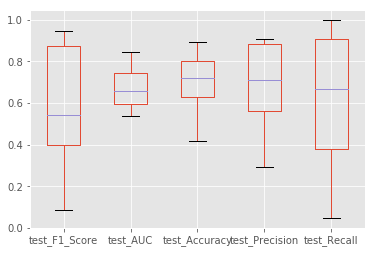

In [27]:
pd.DataFrame(scores)[testCol].boxplot()

In [29]:
from sklearn.model_selection import ShuffleSplit
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
shuffle_cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size = 0.1, random_state=999)
                         
print(shuffle_cv_object)


ShuffleSplit(n_splits=10, random_state=999, test_size=0.1, train_size=None)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}


logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores = cross_validate(logisticModel , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores))
display(pd.DataFrame(scores).mean())
end = datetime.now()


print()
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.3850,0.03,0.775268,0.778855,0.827496,0.829789,0.749226,0.752316,0.772817,0.773054,0.777734,0.784745
1,1.4325,0.03,0.788132,0.777900,0.835867,0.828970,0.764706,0.750940,0.783452,0.771810,0.792869,0.784086
2,1.4050,0.03,0.781732,0.778234,0.838677,0.828603,0.755860,0.751505,0.779882,0.771818,0.783591,0.784757
3,1.3675,0.03,0.782011,0.778980,0.833092,0.829253,0.754533,0.751923,0.767836,0.772082,0.796719,0.786002
4,1.4000,0.04,0.787298,0.777778,0.838794,0.828522,0.764485,0.750399,0.781833,0.770795,0.792840,0.784888
5,1.3600,0.04,0.782333,0.777182,0.831703,0.829384,0.756966,0.750694,0.785601,0.771488,0.779093,0.782961
6,1.3500,0.03,0.774514,0.778807,0.824350,0.830311,0.748784,0.751702,0.763302,0.772398,0.786060,0.785323
7,1.3800,0.04,0.784175,0.778494,0.830247,0.829594,0.756303,0.751628,0.776270,0.771426,0.792244,0.785692
8,0.5900,0.02,0.768526,0.779463,0.823310,0.830286,0.743034,0.752759,0.761247,0.773899,0.775945,0.785109
9,0.5800,0.02,0.771485,0.779363,0.821751,0.830527,0.744803,0.752587,0.762128,0.773346,0.781075,0.785474


fit_time           1.225000
score_time         0.031000
test_F1_Score      0.779547
train_F1_Score     0.778506
test_AUC           0.830529
train_AUC          0.829524
test_Accuracy      0.753870
train_Accuracy     0.751645
test_Precision     0.773437
train_Precision    0.772212
test_Recall        0.785817
train_Recall       0.784904
dtype: float64



 Mean values for Performance Metrices on Train Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.778506,0.829524,0.751645,0.772212,0.784904



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.779547,0.830529,0.75387,0.773437,0.785817


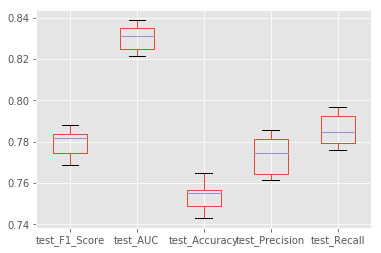

In [33]:
pd.DataFrame(scores)[testCol].boxplot()

**Standard K-fold was chosen for this mode.** Reasons for using k-fold for splitting the data versus Shuffle split
•   Based on the visualization, there are no outliers in standard K-fold
•	ShuffleSplit will randomly sample the entire dataset during each iteration to generate a training set and a test set. Since we are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration. Whereas in K-fold the test data is different in each fold. This generalizes the model for prediction on future datasets.


## Modeling and Evaluation 3

### Getting ready Additional Test Dataset(with 10% instances) for final model fitting and evaluations

In [21]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_h_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_h_df = bankPromoAdditional_h_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['Target'].astype(np.int)
# Delete the original 'housing' column
del bankPromoAdditional_h_df['housing']

bankPromoAdditional_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
Target        4521 non-null int32
dtypes: int32(1), int64(7), object(9)
memory usage: 582.9+ KB


In [22]:
## Test Dataset
###################
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_h_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_h_df = pd.concat((bankPromoAdditional_h_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_h_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_h_df:
    y_Final = bankPromoAdditional_h_df['Target'].values # get the labels we want
    del bankPromoAdditional_h_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_h_df.values

print("Test dataset info")
print("=====================")
bankPromoAdditional_h_df.info()

Test dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 42 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-null uint8
education_secon

### Create Model

#### Simple Logistic Model Fit

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold = cross_validate(logisticModel , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold))
display(pd.DataFrame(scores_kfold).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle = cross_validate(logisticModel , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle))
display(pd.DataFrame(scores_shuffle).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,2.043045,0.114479,0.944613,0.744731,0.574598,0.816525,0.895179,0.735653,0.897026,0.745085,0.997532,0.744378
1,1.879607,0.109446,0.853853,0.751690,0.585186,0.824778,0.752931,0.745441,0.908155,0.759814,0.805679,0.743738
2,1.886063,0.085486,0.500095,0.809572,0.627757,0.842206,0.418491,0.771369,0.343252,0.786251,0.920868,0.834318
3,2.041555,0.093085,0.088985,0.800586,0.538851,0.849564,0.438399,0.779258,0.553571,0.802225,0.048381,0.798954
4,1.826891,0.100516,0.245696,0.792306,0.669041,0.821918,0.786773,0.748169,0.581481,0.775134,0.155754,0.810256
5,1.825351,0.095947,0.590136,0.786064,0.761794,0.834171,0.685689,0.757483,0.719409,0.786815,0.500244,0.785315
6,1.992232,0.097947,0.455639,0.792442,0.696512,0.838221,0.629507,0.761637,0.705231,0.781817,0.336534,0.803358
7,3.823812,0.080319,0.878076,0.754189,0.772711,0.822239,0.807122,0.742910,0.891286,0.762158,0.865252,0.746384
8,1.818219,0.082956,0.900643,0.760999,0.843792,0.821425,0.846273,0.741927,0.857376,0.755513,0.948509,0.766564
9,2.037698,0.077663,0.377330,0.800729,0.646786,0.829804,0.630613,0.758270,0.292317,0.784798,0.532072,0.817321


fit_time           2.117447
score_time         0.093784
test_F1_Score      0.583507
train_F1_Score     0.779331
test_AUC           0.671703
train_AUC          0.830085
test_Accuracy      0.689098
train_Accuracy     0.754212
test_Precision     0.674911
train_Precision    0.773961
test_Recall        0.611083
train_Recall       0.785059
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:00:11.708129




,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,2.184534,0.077950,0.775268,0.778855,0.827496,0.829789,0.749226,0.752316,0.772817,0.773054,0.777734,0.784745
1,2.150011,0.124972,0.788132,0.777900,0.835867,0.828970,0.764706,0.750940,0.783452,0.771810,0.792869,0.784086
2,2.131026,0.095480,0.781732,0.778234,0.838677,0.828603,0.755860,0.751505,0.779882,0.771818,0.783591,0.784757
3,2.261994,0.120514,0.782011,0.778980,0.833092,0.829253,0.754533,0.751923,0.767836,0.772082,0.796719,0.786002
4,2.388806,0.178146,0.787298,0.777778,0.838794,0.828522,0.764485,0.750399,0.781833,0.770795,0.792840,0.784888
5,2.307807,0.125958,0.782333,0.777182,0.831703,0.829384,0.756966,0.750694,0.785601,0.771488,0.779093,0.782961
6,2.366782,0.121443,0.774514,0.778807,0.824350,0.830311,0.748784,0.751702,0.763302,0.772398,0.786060,0.785323
7,2.418973,0.108017,0.784175,0.778494,0.830247,0.829594,0.756303,0.751628,0.776270,0.771426,0.792244,0.785692
8,1.478042,0.075487,0.768526,0.779463,0.823310,0.830286,0.743034,0.752759,0.761247,0.773899,0.775945,0.785109
9,1.466558,0.056030,0.771485,0.779363,0.821751,0.830527,0.744803,0.752587,0.762128,0.773346,0.781075,0.785474


fit_time           2.115453
score_time         0.108400
test_F1_Score      0.779547
train_F1_Score     0.778506
test_AUC           0.830529
train_AUC          0.829524
test_Accuracy      0.753870
train_Accuracy     0.751645
test_Precision     0.773437
train_Precision    0.772212
test_Recall        0.785817
train_Recall       0.784904
dtype: float64

time taken for Logistic Regression with Shuffle cv object
0:00:07.977410



#### Running poylnomial

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel2 = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold2 = cross_validate(logisticModel2 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold2))
display(pd.DataFrame(scores_kfold2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle2 = cross_validate(logisticModel2 , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle2))
display(pd.DataFrame(scores_shuffle2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,696.325340,2.765477,0.945170,0.785199,0.601824,0.855696,0.896064,0.776721,0.896239,0.782627,0.999753,0.787788
1,565.157112,2.596520,0.819712,0.787748,0.592195,0.860283,0.706260,0.781666,0.910434,0.793512,0.745432,0.782068
2,646.139728,2.634551,0.496214,0.832336,0.632943,0.871197,0.440832,0.800909,0.346797,0.816900,0.871849,0.848367
3,601.435450,2.529556,0.464406,0.822294,0.631675,0.875659,0.542358,0.802925,0.690000,0.822458,0.349980,0.822130
4,546.226694,2.693989,0.348553,0.825839,0.676370,0.860427,0.775935,0.788105,0.495430,0.805310,0.268849,0.847442
5,643.732224,2.031840,0.622435,0.820816,0.759851,0.869019,0.686574,0.795134,0.683841,0.814652,0.571149,0.827074
6,611.188166,2.688979,0.534449,0.825147,0.666164,0.871099,0.630834,0.798353,0.637816,0.810788,0.459914,0.840023
7,688.180470,1.603086,0.839953,0.791889,0.771620,0.857495,0.759345,0.779037,0.900915,0.788222,0.786718,0.795591
8,471.425449,1.358225,0.884973,0.797228,0.830222,0.858635,0.819509,0.780708,0.831964,0.790278,0.945197,0.804301
9,423.629601,0.783531,0.368894,0.828717,0.622348,0.863413,0.642778,0.792848,0.293532,0.814597,0.496320,0.843335


fit_time           589.344023
score_time           2.168575
test_F1_Score        0.632476
train_F1_Score       0.811721
test_AUC             0.678521
train_AUC            0.864292
test_Accuracy        0.690049
train_Accuracy       0.789641
test_Precision       0.668697
train_Precision      0.803934
test_Recall          0.649516
train_Recall         0.819812
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:29:05.146339




,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,599.361578,2.512565,0.800315,0.812515,0.851785,0.864261,0.775763,0.788960,0.792821,0.802510,0.807952,0.822772
1,613.813326,2.223731,0.808485,0.811089,0.859143,0.863162,0.786378,0.786969,0.800235,0.800344,0.816907,0.822126
2,719.080238,2.477588,0.811765,0.810918,0.862007,0.862917,0.787705,0.787363,0.803260,0.801391,0.820452,0.820675
3,631.250372,2.141786,0.810588,0.812057,0.855950,0.863685,0.786378,0.788075,0.794694,0.801247,0.827131,0.823163
4,410.447711,2.488578,0.811047,0.811267,0.863257,0.862834,0.789695,0.787240,0.801335,0.801119,0.820998,0.821675
5,639.324061,2.574531,0.801990,0.810330,0.851309,0.864012,0.779965,0.786650,0.809237,0.800207,0.794872,0.820713
6,685.550675,2.823392,0.804493,0.812186,0.849843,0.864287,0.780628,0.788493,0.787423,0.802969,0.822321,0.821618
7,706.072124,2.130784,0.795762,0.812512,0.848338,0.864507,0.769792,0.788911,0.789105,0.801922,0.802533,0.823386
8,554.663549,1.456168,0.799127,0.812253,0.846864,0.864569,0.776205,0.788665,0.788793,0.803256,0.809735,0.821454
9,413.419742,0.938464,0.798974,0.813192,0.846567,0.864553,0.774657,0.789378,0.786408,0.802625,0.811949,0.824041


fit_time           597.298337
score_time           2.176759
test_F1_Score        0.804255
train_F1_Score       0.811832
test_AUC             0.853506
train_AUC            0.863879
test_Accuracy        0.780716
train_Accuracy       0.788070
test_Precision       0.795331
train_Precision      0.801759
test_Recall          0.813485
train_Recall         0.822162
dtype: float64

time taken for Logistic Regression with Shuffle cv object
0:28:53.219431



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## polynomial of degree 3

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel3 = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold3 = cross_validate(logisticModel3 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold3))
display(pd.DataFrame(scores_kfold3).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()


#### Fir the Model

#### Interpret Feature Importance

month_aug has weight of -0.8218055880934713
month_jun has weight of -0.5133078366224679
age has weight of -0.34770575197344655
month_jul has weight of -0.33219653576913705
month_feb has weight of -0.30401987123143503
job_student has weight of -0.2298849457383366
month_jan has weight of -0.22251032200338852
month_sep has weight of -0.21537644820959612
month_oct has weight of -0.21508786998788285
Subscribed_yes has weight of -0.21214732837628966
marital_single has weight of -0.20485834964766605
job_retired has weight of -0.20184179660375864
job_unknown has weight of -0.17482566966737745
month_mar has weight of -0.16929127133360752
month_nov has weight of -0.1548033384929472
month_dec has weight of -0.13777989156208167
poutcome_success has weight of -0.12940030098315464
day has weight of -0.11748156842113988
job_housemaid has weight of -0.10266310732500522
job_unemployed has weight of -0.0914933371853685
contact_telephone has weight of -0.06990775131880754
education_unknown has weight of 

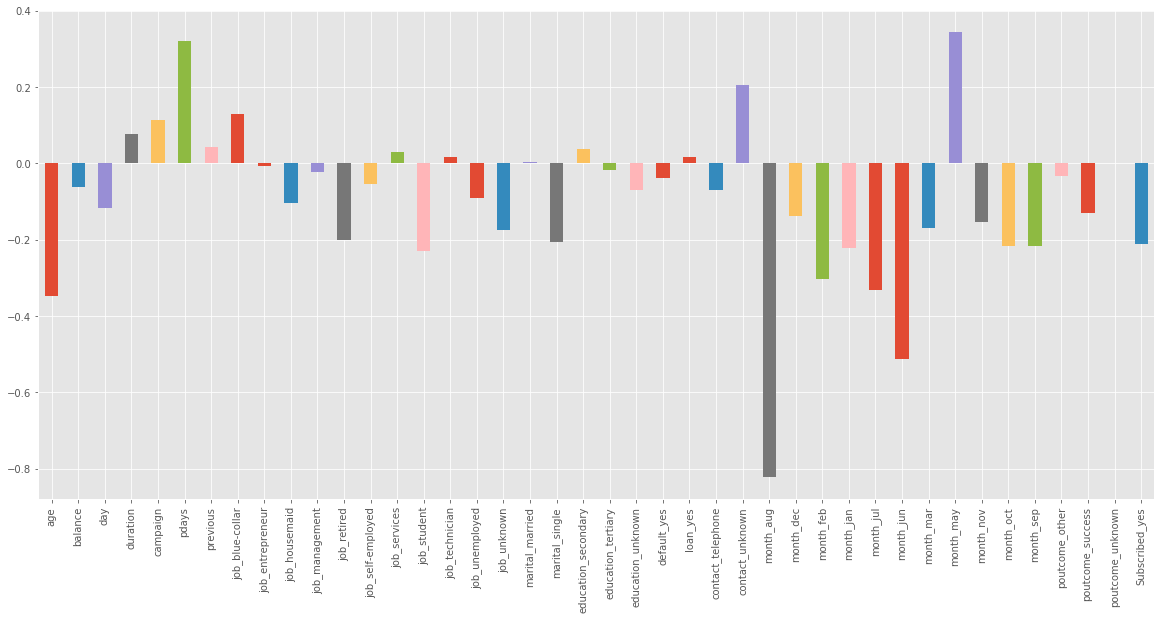

### Tuning The Model Hyper Paramters Using Grid Search

In [14]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = kfold_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 75.43120063354607, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'} with a score of 0.69


In [15]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = shuffle_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 0.0020235896477251557, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'} with a score of 0.75


### Feature selection based on pearson coeff and Chi-Sq2 tests and top 18 imp features

In [35]:
# create dataframes on selected features
## based on 2 methods 18 features
bankPromoModel_hsng218_Df = bankPromo_df.copy()
bankPromoModel_hsng218_Df['Target'] = bankPromoModel_hsng218_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng218_Df['Target'] = bankPromoModel_hsng218_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng218_Df['housing']
del bankPromoModel_hsng218_Df['default']
del bankPromoModel_hsng218_Df['previous']
del bankPromoModel_hsng218_Df['marital']
del bankPromoModel_hsng218_Df['duration']
del bankPromoModel_hsng218_Df['day']
del bankPromoModel_hsng218_Df['campaign']
del bankPromoModel_hsng218_Df['balance']


# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars218 = list()
# List to hold names of numerical variables
numericalVars218 = list()

for colName in bankPromoModel_hsng218_Df.columns:
    if bankPromoModel_hsng218_Df[colName].dtype == np.int64:
        numericalVars218.append(colName)
    elif bankPromoModel_hsng218_Df[colName].dtype == np.object:
        categoricalVars218.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
#categoricalVars618.remove('Target')

print(numericalVars218)
print(categoricalVars218)

# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars218:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng218_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng218_Df = pd.concat((bankPromoModel_hsng218_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng218_Df.drop(categoricalVars218, inplace=True, axis=1)
bankPromoModel_hsng218_Df.info()

['age', 'pdays']
['job', 'education', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                    45211 non-null int64
pdays                  45211 non-null int64
Target                 45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
education_unknown      45211 non-null uint8
loan_yes               45211 non-null uint8
contact

#### Create 10 Splits Stratified Cross Validation Object

In [36]:
# Training and Test Split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

if 'Target' in bankPromoModel_hsng218_Df:
    y218 = bankPromoModel_hsng218_Df['Target'].values # get the labels we want
    del bankPromoModel_hsng218_Df['Target']        # get rid of the class label
    X218 = bankPromoModel_hsng218_Df.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold218 = cross_validate(logisticModel , X218, y=y218 , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold218))
display(pd.DataFrame(scores_kfold218).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle218 = cross_validate(logisticModel , X218, y=y218 , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle218))
display(pd.DataFrame(scores_shuffle218).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.550702,0.085951,0.944477,0.739109,0.578961,0.810300,0.894958,0.729042,0.897180,0.737312,0.997038,0.740915
1,1.441770,0.096944,0.842384,0.745253,0.595578,0.819401,0.736784,0.738216,0.908571,0.751471,0.785185,0.739137
2,1.300789,0.088983,0.489116,0.805937,0.617726,0.837935,0.403008,0.765421,0.335149,0.777773,0.904762,0.836216
3,1.440767,0.099941,0.075350,0.793940,0.513998,0.845366,0.429993,0.772352,0.468750,0.797150,0.040968,0.790756
4,1.331774,0.088950,0.268366,0.787144,0.664718,0.815946,0.784119,0.741214,0.549080,0.768108,0.177579,0.807147
5,1.199850,0.074965,0.584096,0.781361,0.764440,0.828571,0.678390,0.751389,0.703653,0.779709,0.499267,0.783019
6,1.121871,0.094946,0.409184,0.788911,0.691436,0.833053,0.618668,0.756550,0.714970,0.775135,0.286606,0.803185
7,2.972302,0.048973,0.888950,0.749460,0.773183,0.816797,0.820173,0.737626,0.881365,0.756383,0.896666,0.742663
8,1.020419,0.064963,0.897564,0.756787,0.833758,0.816321,0.840964,0.736471,0.851812,0.748788,0.948509,0.764959
9,1.177328,0.067977,0.370974,0.795416,0.644534,0.824746,0.624198,0.751241,0.286286,0.777839,0.526814,0.813805


fit_time           1.455757
score_time         0.081259
test_F1_Score      0.577046
train_F1_Score     0.774332
test_AUC           0.667833
train_AUC          0.824844
test_Accuracy      0.683126
train_Accuracy     0.747952
test_Precision     0.659682
train_Precision    0.766967
test_Recall        0.606339
train_Recall       0.782180
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:00:10.290283




,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.683035,0.091948,0.774892,0.773085,0.822790,0.824528,0.747015,0.745140,0.767043,0.765216,0.782903,0.781119
1,1.558111,0.100942,0.775144,0.773766,0.829510,0.823909,0.750332,0.745582,0.770693,0.765568,0.779647,0.782142
2,1.660052,0.107941,0.779394,0.773131,0.834068,0.823295,0.751880,0.745091,0.773313,0.764701,0.785573,0.781749
3,1.748003,0.176416,0.777734,0.773685,0.827675,0.824061,0.750111,0.745263,0.764797,0.764719,0.791116,0.782864
4,1.606099,0.103942,0.778264,0.773096,0.832877,0.823397,0.753649,0.744550,0.770292,0.764419,0.786404,0.781973
5,1.491657,0.107939,0.775050,0.773234,0.824467,0.824407,0.748784,0.745312,0.778131,0.764716,0.771992,0.781943
6,1.512645,0.086950,0.772781,0.773454,0.819409,0.825066,0.745245,0.745042,0.756955,0.765166,0.789283,0.781923
7,1.498651,0.079954,0.773307,0.774222,0.824163,0.824513,0.744582,0.746000,0.767134,0.764716,0.779581,0.783967
8,0.853510,0.049978,0.766169,0.774012,0.819647,0.824888,0.740159,0.746025,0.758173,0.766635,0.774336,0.781532
9,0.822529,0.046974,0.767156,0.774154,0.816886,0.825277,0.740380,0.745902,0.759027,0.765674,0.775461,0.782824


fit_time           1.443429
score_time         0.095298
test_F1_Score      0.773989
train_F1_Score     0.773584
test_AUC           0.825149
train_AUC          0.824334
test_Accuracy      0.747214
train_Accuracy     0.745391
test_Precision     0.766556
train_Precision    0.765153
test_Recall        0.781630
train_Recall       0.782204
dtype: float64

time taken for Logistic Regression with Shuffle cv object
0:00:05.943616



________________________________________________________________________________________________________
<a id="CreateLRModel"></a>
<a href="#top">Back to Top</a>
# Create Model

________________________________________________________________________________________________________
<a id="SVMModel"></a>
<a href="#top">Back to Top</a>
### Simple Random Forest Model Fit

In [9]:
########## Random Forest ############################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1))
scores = cross_validate(baseRfModel, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.176114,0.534747,0.896149,0.987041,0.571459,0.999279,0.815126,0.986679,0.902201,0.994939,0.890178,0.979267
1,1.164129,0.532699,0.612521,0.985981,0.591019,0.999197,0.479761,0.985598,0.920297,0.994546,0.459012,0.977562
2,1.134430,0.536497,0.468588,0.989164,0.615618,0.999279,0.592126,0.987442,0.398139,0.994372,0.569328,0.984010
3,1.159558,0.532365,0.325622,0.987655,0.555389,0.999319,0.484185,0.986409,0.629050,0.995186,0.219664,0.980237
4,1.105849,0.531151,0.257084,0.989353,0.636202,0.999351,0.762221,0.987442,0.423690,0.994513,0.184524,0.984247
5,1.078768,0.534301,0.593172,0.988580,0.721869,0.999325,0.654722,0.987122,0.635045,0.994780,0.556479,0.982456
6,1.113295,0.535136,0.509861,0.988034,0.675282,0.999286,0.626189,0.986532,0.643956,0.994505,0.421988,0.981646
7,1.032596,0.530560,0.741019,0.986357,0.765246,0.999155,0.649193,0.985697,0.909419,0.994329,0.625241,0.978513
8,1.059316,0.537769,0.866192,0.985505,0.813121,0.999079,0.804689,0.984591,0.871873,0.993845,0.860584,0.977303
9,1.035465,0.537426,0.354954,0.988036,0.635451,0.999086,0.641451,0.985869,0.285531,0.994180,0.468980,0.981968


The base model is overfitting as the training accuracy is 99.9%. To avoid overfitting added hyper parameter criterion 

In [26]:
#################################
# Create randomized grid
#################################

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'log2', 8, 9, 10]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [x for x in np.arange(2, 101, 10)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in np.arange(1, 101, 4)]

#Class weights
class_weight = [None, 'balanced', 'balanced_subsample']

# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
              'randomforestclassifier__max_features': max_features,
              'randomforestclassifier__max_depth': max_depth,
              'randomforestclassifier__min_samples_split': min_samples_split,
              'randomforestclassifier__min_samples_leaf': min_samples_leaf,
              'randomforestclassifier__class_weight': class_weight,
              'randomforestclassifier__bootstrap': bootstrap,
              'randomforestclassifier__criterion': criterion}

print(random_grid)

{'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomforestclassifier__max_features': ['auto', 'log2', 8, 9, 10], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestclassifier__min_samples_split': [2, 12, 22, 32, 42, 52, 62, 72, 82, 92], 'randomforestclassifier__min_samples_leaf': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97], 'randomforestclassifier__class_weight': [None, 'balanced', 'balanced_subsample'], 'randomforestclassifier__bootstrap': [True, False], 'randomforestclassifier__criterion': ['gini', 'entropy']}


### Randomized Grid Search for Random Forest

In [27]:
from sklearn.model_selection import RandomizedSearchCV
#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier() #Originally was this
rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomgrid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                   n_iter = 200, 
                                   cv = kfold_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scoring,
                                   refit='Accuracy', \
                                   return_train_score=True)


# Fit the random search model
rf_randomgrid.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rf_randomgrid.best_params_, rf_randomgrid.best_score_))
#rf_random.best_params_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 65.0min
[Parallel(n_jobs=-1)]: Done 1857 tasks      | elapsed: 94.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 99.4min finished


The best parameters are {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 82, 'randomforestclassifier__min_samples_leaf': 25, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 30, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__bootstrap': False} with a score of 0.69


In [10]:

rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 200, min_samples_split = 82, min_samples_leaf = 25, \
                                                                         max_features = 'log2', max_depth = 30, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,8.173242,1.130251,0.945183,0.794560,0.632266,0.874154,0.896064,0.795448,0.896064,0.828145,1.000000,0.763592
1,8.118589,1.212926,0.854148,0.793773,0.597230,0.876642,0.753816,0.796854,0.910081,0.837175,0.804691,0.754649
2,7.784884,1.416365,0.499487,0.821021,0.641772,0.885518,0.460960,0.803219,0.353386,0.873069,0.851541,0.774829
3,8.335069,0.958800,0.130249,0.821248,0.599030,0.892708,0.459412,0.814008,0.740891,0.879318,0.071401,0.770373
4,8.360055,0.961714,0.099815,0.815014,0.683090,0.881721,0.784561,0.795675,0.729730,0.879599,0.053571,0.759265
5,8.212106,1.101879,0.603139,0.817914,0.776542,0.887913,0.686795,0.806955,0.706500,0.879725,0.526161,0.764219
6,8.162438,1.108456,0.544082,0.824281,0.731959,0.888828,0.666003,0.811403,0.733116,0.872679,0.432549,0.780969
7,8.209686,1.110232,0.795808,0.797653,0.788606,0.878692,0.706923,0.798280,0.902797,0.848660,0.711491,0.752430
8,8.223480,1.038435,0.898419,0.802842,0.856661,0.876029,0.842292,0.798820,0.852623,0.845568,0.949413,0.764226
9,8.181271,1.123418,0.371585,0.817368,0.643284,0.880685,0.643884,0.796977,0.295469,0.878028,0.500526,0.764548



 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.574191,0.695044,0.690071,0.712066,0.590134



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.810567,0.882289,0.801764,0.862197,0.76491


Based on the above output, the training accuracy is around 80% and is not overfitted as seen in the base model. We will now proceed with GridSearch using the parameters from random grid search. **We split the grid search into five sub grids to speed the grid search process.**

In [14]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [200, 202, 204, 206]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [27,28]

# Minimum number of samples required to split a node
min_samples_split = [81,83,85]

min_samples_leaf = [18,20,22]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


{'randomforestclassifier__n_estimators': [200, 202, 204, 206], 'randomforestclassifier__max_features': ['log2'], 'randomforestclassifier__max_depth': [27, 28], 'randomforestclassifier__min_samples_split': [81, 83, 85], 'randomforestclassifier__min_samples_leaf': [18, 20, 22], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__criterion': ['entropy'], 'randomforestclassifier__bootstrap': [False]}


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.8min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 28, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 22, 'randomforestclassifier__min_samples_split': 83, 'randomforestclassifier__n_estimators': 200} with a score of 0.69


In [ ]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [201, 203, 205, 207]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [25,26]

# Minimum number of samples required to split a node
min_samples_split = [80,82,84]

min_samples_leaf = [24,25,26]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.6min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 25, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 25, 'randomforestclassifier__min_samples_split': 80, 'randomforestclassifier__n_estimators': 207} with a score of 0.69


In [18]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [191, 192, 193, 194]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [29,30]

# Minimum number of samples required to split a node
min_samples_split = [76,78,86]

min_samples_leaf = [19,21,23]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)

{'randomforestclassifier__n_estimators': [191, 192, 193, 194], 'randomforestclassifier__max_features': ['log2'], 'randomforestclassifier__max_depth': [29, 30], 'randomforestclassifier__min_samples_split': [76, 78, 86], 'randomforestclassifier__min_samples_leaf': [19, 21, 23], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__criterion': ['entropy'], 'randomforestclassifier__bootstrap': [False]}


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.1min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 29, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 19, 'randomforestclassifier__min_samples_split': 76, 'randomforestclassifier__n_estimators': 194} with a score of 0.69


In [20]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [195, 196, 197, 198]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [31,32]

# Minimum number of samples required to split a node
min_samples_split = [77,79,87]

min_samples_leaf = [27,28,29]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)

{'randomforestclassifier__n_estimators': [195, 196, 197, 198], 'randomforestclassifier__max_features': ['log2'], 'randomforestclassifier__max_depth': [31, 32], 'randomforestclassifier__min_samples_split': [77, 79, 87], 'randomforestclassifier__min_samples_leaf': [27, 28, 29], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__criterion': ['entropy'], 'randomforestclassifier__bootstrap': [False]}


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 13.9min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 32, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 27, 'randomforestclassifier__min_samples_split': 79, 'randomforestclassifier__n_estimators': 197} with a score of 0.69


In [22]:
########################################################
# Create Smaller grid 1 based upon Random Grid CV results
#######################################################

# Number of trees in random forest
n_estimators = [191,199,208,209]

# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [33,34]

# Minimum number of samples required to split a node
min_samples_split = [88,89,90]

min_samples_leaf = [30,31,32]

criterion = ['entropy']

class_weight = ['balanced']

# Method of selecting samples for training each tree
bootstrap = [False]

# Create the random grid
subGrid = {'randomforestclassifier__n_estimators': n_estimators,
        'randomforestclassifier__max_features': max_features,
        'randomforestclassifier__max_depth': max_depth,
        'randomforestclassifier__min_samples_split': min_samples_split,
        'randomforestclassifier__min_samples_leaf': min_samples_leaf,
        'randomforestclassifier__class_weight': class_weight,
        'randomforestclassifier__criterion' : criterion,
        'randomforestclassifier__bootstrap': bootstrap}

print(subGrid)

{'randomforestclassifier__n_estimators': [191, 199, 208, 209], 'randomforestclassifier__max_features': ['log2'], 'randomforestclassifier__max_depth': [33, 34], 'randomforestclassifier__min_samples_split': [88, 89, 90], 'randomforestclassifier__min_samples_leaf': [30, 31, 32], 'randomforestclassifier__class_weight': ['balanced'], 'randomforestclassifier__criterion': ['entropy'], 'randomforestclassifier__bootstrap': [False]}


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#################################
# Sub Grid Search
#################################

scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

rfSubGridEstimator = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

rfSubGridModel = GridSearchCV(estimator = rfSubGridEstimator, 
                              param_grid= subGrid,  
                              cv = kfold_cv_object,
                              verbose=2, 
                              n_jobs = -1,
                              scoring=scoring,
                              refit='Accuracy', 
                              return_train_score=True)


# Fit the random search model
rfSubGridModel.fit(X, y=y)

print("The best parameters are %s with a score of %0.2f"
      % (rfSubGridModel.best_params_, rfSubGridModel.best_score_))


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.0min finished


The best parameters are {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 34, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 30, 'randomforestclassifier__min_samples_split': 88, 'randomforestclassifier__n_estimators': 191} with a score of 0.69


In [36]:
# Fitting the model using parameter from first Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 191, min_samples_split = 88, min_samples_leaf = 30, \
                                                                         max_features = 'log2', max_depth = 34, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.571489,0.691526,0.688301,0.717623,0.587227



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.80734,0.879171,0.798636,0.860085,0.76085


In [27]:
# Fitting the model using parameter from second Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 197, min_samples_split = 79, min_samples_leaf = 27, \
                                                                         max_features = 'log2', max_depth = 32, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.577149,0.694355,0.690513,0.714612,0.593358



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.809876,0.881481,0.801027,0.861577,0.764184


In [28]:
# Fitting the model using parameter from third Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 194, min_samples_split = 76, min_samples_leaf = 19, \
                                                                         max_features = 'log2', max_depth = 29, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.577023,0.695651,0.694627,0.717628,0.584089



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.814803,0.887103,0.805969,0.865543,0.769817


In [31]:
# Fitting the model using parameter from fourth Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 207, min_samples_split = 80, min_samples_leaf = 25, \
                                                                         max_features = 'log2', max_depth = 25, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.578606,0.695207,0.691995,0.715741,0.58809



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.810158,0.882294,0.801361,0.861934,0.764393


In [32]:
# Fitting the model using parameter from fourth Grid Search
rfRandomGridEst = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 200, min_samples_split = 83, min_samples_leaf = 22, \
                                                                         max_features = 'log2', max_depth = 28, class_weight = "balanced", \
                                                                         criterion = 'entropy', bootstrap = False,random_state=999, n_jobs=-1))

scores = cross_validate(rfRandomGridEst, X, y=y, cv=kfold_cv_object, n_jobs=-1, scoring=scoring)

#display(pd.DataFrame(scores).mean())

print("\n Mean values for Performance Metrices on Test Set are .......")
testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

print("\n Mean values for Performance Metrices on Training Set are .......")
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


 Mean values for Performance Metrices on Test Set are .......


,test_F1_Score,test_AUC,test_Accuracy,test_Precision,test_Recall
0,0.580179,0.696036,0.693322,0.71494,0.590794



 Mean values for Performance Metrices on Training Set are .......


,train_F1_Score,train_AUC,train_Accuracy,train_Precision,train_Recall
0,0.811959,0.883871,0.803089,0.863058,0.766726


The model was fitted with best parameter from each grid search to compare accuracy and AuC. 
The parameter set that gives the highes accuracy is as below
n_estimators = 194 
min_samples_split = 76
min_samples_leaf = 19
max_features = 'log2'
max_depth = 29
class_weight = "balanced"
criterion = 'entropy' 
bootstrap = False
random_state=999, n_jobs=-1

The metrics are 
	test_F1_Score	test_AUC	test_Accuracy	test_Precision	test_Recall
0	0.577023	0.695651	0.694627	0.717628	0.584089


### Deployment of Models for Task 1 and Task 2

The models that we have derived, for both home loans and subscription to term deposits,  are of interest to the bank.  Banks, similar to other businesses, have a business case to increase customer base (or increase what current customers use the bank for) without increasing (or decrease) their customer acquisition cost.  We have focused on building predictive models for existing bank customers and would not affect the acquisiton cost for new customers.

In order to benefit the bank's sales, the banks could use these models to increase probability of the customers they phone that ultimately will subscribe to a term deposit or invest in a home.  This reduces the number of phone calls, reduces the hours that are paid to the bankers to make those phone calls and increases the probaility of the banks earning interest on the term deposits or home loans.

We would encourage the bankers to continue to enter the data in order to refine the model at a later date.  Market changes could effect the models' accuracy and continuing to collect data will make it simplier to refine for the next campaign.  Since the models do not need to be used for each phone call, the use of the model can be deployed to a few people in the bank and then the list of more likely candidates be distributed to the bankers that will be contacting the existing customers.  The use of the models could also be added to the process during signing up new customers.  The bank could run the model on the attributes of the new customer and then make offers on the spot if the model shows the determined level of probability. 

The attribute that we believe would refine the models even further and increase the models' performance is income.  Income is important to home loans as it shows purchasing power on average homes in the neighborhood.  Income is important to term deposits as it is an indicator on disposable income of the customers to save more. 

The model could be refined in any time intervals, but at a minimum the model should be updated significant change in the market or national interst rate adjustments.

Note:  We have no evidence that these models can be extrapolated to other banks in Portugal or other countries.  (Despite us not knowing the randomness of the sample or the calls, we are going to assume that they were random in this case and we can use the model to predict the subscribe or housing outcomes to the entire bank population).
